# Job Analysis

1. Data Cleaning
2. EDA
3. Modeling


In [124]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('Glassdoor_DS_jobs.csv')

In [126]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## Data Cleaning

#### 1) Salary Cleaning

In [127]:
df['salary'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0].strip())
df['salary'] = df['salary'].apply(lambda x: x.replace('$',"").replace('K',""))
df['min_salary'] = df['salary'].apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = df['salary'].apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df['min_salary'] + df['max_salary'])/2


#### 2) Job Title Cleaning

In [128]:
def job_cate(x):
    x = x.lower()
    if "data scientist" in x:
        return "Data Scientist"
    elif "data engineer" in x:
        return "Data Engineer"
    elif "analyst" in x:
        return "Data Analyst"
    elif "machine learning" in x:
        return "Machine learning engineer"
    elif "scientist" in x:
        return "Scientist"
    else:
        return "NA"
def seniority(x):
    x = x.lower()
    high = ['lead', 'director', 'manager', 'officer']
    seniors = ['senior', 'sr', 'sr.']
    for high_ele in high:
        if high_ele in x:
            return "high"
    
    for senior in seniors:
        if senior in x:
            return "senior"
    return "NA"


df['Job_Category'] = df['Job Title'].apply(job_cate)
df['seniority'] = df['Job Title'].apply(seniority)
 

#### 3) State, age_of_company, num_competitors


In [129]:
df["state"] = df["Location"].apply(lambda x: x.split(",")[1].strip() if len(x.split(",")) == 2 else x)
wrong_str = {"United States": "NA","New Jersey" : "NJ", "Utah" : "UT","Texas" :  "TX", "Patuxent, Anne Arundel, MD" : "MD","California" : "CA"}
df["state"] = df["state"].apply(lambda x: wrong_str[x] if x in wrong_str else x)
df["state"].value_counts()

df["age_of_company"] = df["Founded"].apply(lambda x: 2022 - int(x) if isinstance(x,int) and x > 0 else -1) 
df["age_of_company"].value_counts()
df["num_competitors"] = df["Competitors"].apply(lambda x: len(x.split(',')) if isinstance(x,str) and not('-1' in x)  else -1 )

In [130]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary', 'min_salary', 'max_salary', 'avg_salary', 'Job_Category',
       'seniority', 'state', 'age_of_company', 'num_competitors'],
      dtype='object')

#### 4) Job Description, Company Name Cleaning


In [131]:

df["Company Name"] = df["Company Name"].apply(lambda x : x.split("\n")[0] ) 
df["Job Description"] = df["Job Description"].apply(lambda x : x.replace("\n", " ") )

df["Revenue"].value_counts()


Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64

#### 5) Size, Revenue

In [132]:
def size_cleaning(x):
    if x == "-1" or x == "Unknown":
        x = "NA" 
    elif "10000+" in x:
        x = 10000
    else:
        x = int((int(x.split(" to ")[0]) + int(x.split(" to ")[1].split()[0]) )/2)
    return x
df["company_size"] = df["Size"].apply(size_cleaning)
df["company_size"]

def revenue_cleaning(x):
    if x == "-1":
        x = "NA"
    elif "$10+ billion" in x:
        x = 10 * 1000
    elif "Less than $1 million" in x:
        x = 1
    elif "$500 million to $1 billion" in x:
        x = 750
    elif  "billion" in x:
        x = (int(x.replace("$", "").split(" ")[0]) + int(x.replace("$", "").split(" to ")[1].split(" ")[0]) )/ 2 * 1000
    elif "million" in x:
        x = (int(x.replace("$", "").split(" ")[0]) + int(x.replace("$", "").split(" to ")[1].split(" ")[0]) )/ 2
    return x

df["Rev_million"] = df["Revenue"].apply(revenue_cleaning)
df["Rev_million"].value_counts()

Unknown / Non-Applicable    213
300.0                        94
10000                        63
3500.0                       45
17.5                         41
1500.0                       36
37.5                         36
75.0                         31
3.0                          31
NA                           27
750                          19
7.5                          14
1                            14
7500.0                        8
Name: Rev_million, dtype: int64

#### 6) Keyword selection from job description


In [133]:
# we would like to extract few key words that I believe is critical to data scientist role
word_list = ["python","r studio","excel","sql","gcp","aws"]
for word in word_list:
    df[word] = df["Job Description"].apply(lambda x: 1 if word in x.lower() else 0)

df_original = df

In [134]:
# Let's make a dataframe with the columns that we only need
df.columns
df = df[['Job Title', 'Job_Category','seniority', 'Job Description', 'Rating',
       'Company Name', 'state' , 'company_size', 'Sector', 'Type of ownership', 'Rev_million','num_competitors',
       'avg_salary', 'age_of_company',"python","r studio","excel","sql","gcp","aws"]]


## EDA

There are two parts in this analysis.

1) Understand the columns itself
    - qunatative columns analysis
    - correlation of quantative columns
    

2) See the relationship between columns using pivot table


In [135]:
df.describe()

,Rating,num_competitors,avg_salary,age_of_company,python,r studio,excel,sql,gcp,aws
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,3.518601,-0.044643,123.663690,31.065476,0.730655,0.001488,0.440476,0.529762,0.032738,0.258929
std,1.410329,1.656249,39.580268,39.766853,0.443950,0.038576,0.496814,0.499485,0.178083,0.438373
min,-1.000000,-1.000000,43.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,-1.000000,103.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,-1.000000,114.000000,18.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.300000,1.000000,136.500000,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,5.000000,3.000000,271.500000,241.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now let's understand quantitative columns with the corresponding histogram

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'num_competitors'}>,
        <AxesSubplot:title={'center':'avg_salary'}>],
       [<AxesSubplot:title={'center':'age_of_company'}>,
        <AxesSubplot:title={'center':'python'}>,
        <AxesSubplot:title={'center':'r studio'}>],
       [<AxesSubplot:title={'center':'excel'}>,
        <AxesSubplot:title={'center':'sql'}>,
        <AxesSubplot:title={'center':'gcp'}>],
       [<AxesSubplot:title={'center':'aws'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

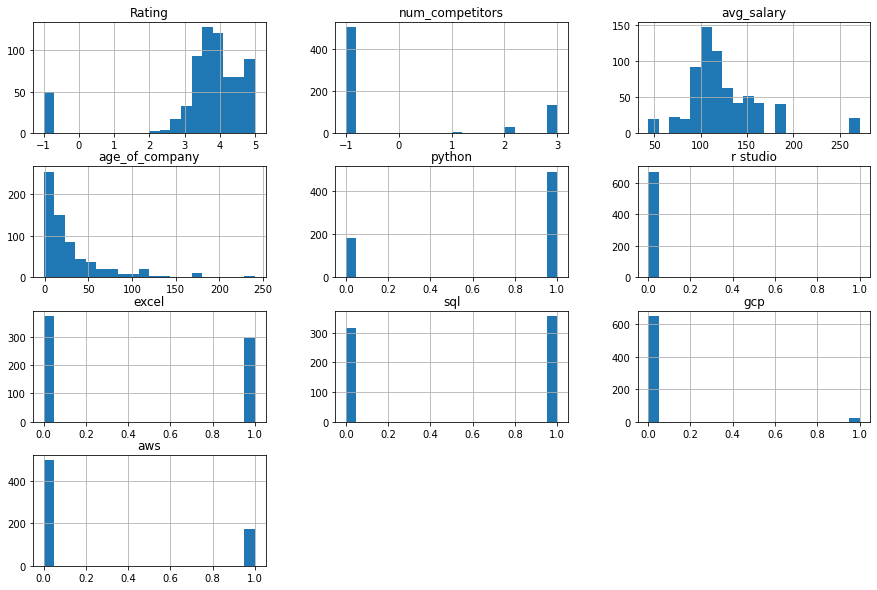

In [136]:
df.hist(bins = 20, figsize = (15,10))

                   Rating  num_competitors  avg_salary  age_of_company  \
Rating           1.000000         0.136062   -0.071066        0.132627   
num_competitors  0.136062         1.000000   -0.004822        0.311530   
avg_salary      -0.071066        -0.004822    1.000000       -0.046395   
age_of_company   0.132627         0.311530   -0.046395        1.000000   
python           0.087752         0.026186   -0.011821       -0.056993   
r studio         0.037841        -0.022284   -0.007968       -0.021437   
excel           -0.023835         0.061968   -0.016670        0.028787   
sql              0.069134        -0.003796    0.005369        0.026162   
gcp              0.082425        -0.050618   -0.011967       -0.070591   
aws             -0.124472        -0.004582   -0.042859       -0.003368   

                   python  r studio     excel       sql       gcp       aws  
Rating           0.087752  0.037841 -0.023835  0.069134  0.082425 -0.124472  
num_competitors  0.026186 -0.

<AxesSubplot:>

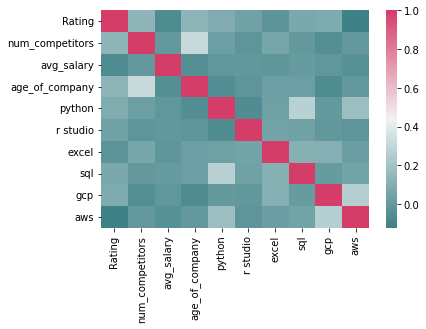

In [137]:
print(df.corr())
cmap = sns.diverging_palette(200, 0, as_cmap = True)
sns.heatmap(df.corr(), cmap = cmap)

Let's do analysis for categorical variabales

/var/folders/ph/yfqxnlss1ds28x8n8wzmqfg00000gn/T/ipykernel_5994/4116102487.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


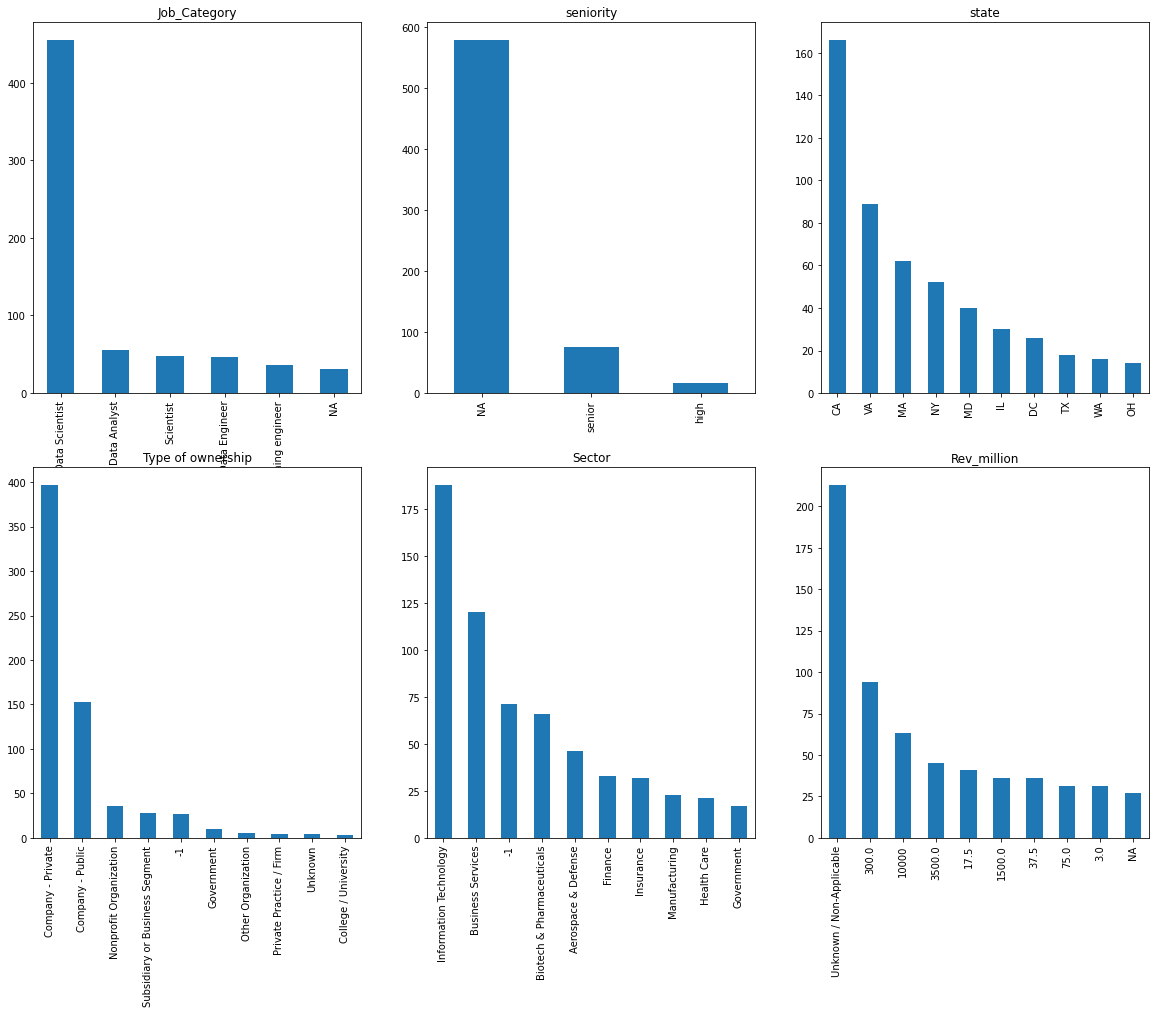

In [138]:
categorical_features = ["Job_Category", "seniority", "state", "Type of ownership","Sector", "Rev_million"]
fig, ax = plt.subplots(2, 3, figsize = (20,15))
#fig.tight_layout()
axe = ax.ravel()

for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().head(10).plot(kind = "bar", ax=axe[i]).set_title(categorical_feature)
fig.show()

In [139]:
# Alternatively we can plot one columns after another using the below method
# for i in df[categorical_features].columns:
#     cat_num = df[categorical_features][i].value_counts()
#     chart = sns.barplot(x = cat_num.index, y = cat_num)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
#     plt.show()



Now let's see the relationships btw variables and avg_salary

In [140]:
df["count"] = 1
df.columns
pivot_columns = ['Job_Category', 'Rating',
       'Company Name', 'state', 'company_size', 'Sector', 'Type of ownership',
       'Rev_million', 'num_competitors', 'avg_salary', 'age_of_company',
       'python', 'r studio', 'excel', 'sql', 'gcp', 'aws', "count"]
for column in pivot_columns:
    if column != "avg_salary" and column != "count":
        print(column)
        print(pd.pivot_table(df, index = column, values = ['avg_salary', 'count'], aggfunc= {'avg_salary' : np.mean, "count" : len}).sort_values('avg_salary', ascending= False).to_string())

Job_Category
                           avg_salary  count
Job_Category                                
Scientist                  134.375000     48
Data Scientist             125.216484    455
NA                         120.790323     31
Machine learning engineer  117.236111     36
Data Analyst               115.718182     55
Data Engineer              113.808511     47
Rating
        avg_salary  count
Rating                   
 2.0    148.000000      1
 2.7    145.200000     10
-1.0    134.660000     50
 2.3    133.000000      1
 3.5    131.051724     58
 3.4    130.387097     31
 4.5    129.421875     32
 3.8    127.538462     39
 3.6    126.854839     31
 4.1    126.360000     25
 4.2    125.827586     29
 3.2    124.333333     21
 4.6    124.000000     12
 3.9    123.725000     40
 4.4    122.229167     24
 4.8    121.550000     20
 5.0    121.041667     36
 4.7    120.772727     22
 4.0    120.097561     41
 3.3    119.731707     41
 4.3    117.285714     14
 3.1    115.708333    

/var/folders/ph/yfqxnlss1ds28x8n8wzmqfg00000gn/T/ipykernel_5994/1565876378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["count"] = 1


## Model Building

In [141]:
import sklearn

In [142]:
# let's pull out only the columns that we can use for the multilinear regression
df.columns

for column in list(df.columns):
    if column != "Job Description":
        print(df[column].value_counts())

# go thorough the values for each columns for the last time
df.drop('count', axis = 1)

# there are queit large portion of NA and -1. However, let's try to consider them as a value itself and build a model.



Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: Job Title, Length: 172, dtype: int64
Data Scientist               455
Data Analyst                  55
Scientist                     48
Data Engineer                 47
Machine learning engineer     36
NA                            31
Name: Job_Category, dtype: int64
NA        579
senior     76
high       17
Na

,Job Title,Job_Category,seniority,Job Description,Rating,Company Name,state,company_size,Sector,Type of ownership,Rev_million,num_competitors,avg_salary,age_of_company,python,r studio,excel,sql,gcp,aws
0,Sr Data Scientist,Data Scientist,senior,Description The Senior Data Scientist is resp...,3.1,Healthfirst,NY,3000,Insurance,Nonprofit Organization,Unknown / Non-Applicable,3,154.0,29,0,0,0,0,0,1
1,Data Scientist,Data Scientist,NA,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,VA,7500,Business Services,Company - Public,1500.0,-1,154.0,54,0,0,0,1,0,0
2,Data Scientist,Data Scientist,NA,Overview Analysis Group is one of the larges...,3.8,Analysis Group,MA,3000,Business Services,Private Practice / Firm,300.0,-1,154.0,41,1,0,1,0,0,1
3,Data Scientist,Data Scientist,NA,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,MA,750,Manufacturing,Company - Public,300.0,3,154.0,22,1,0,1,1,0,1
4,Data Scientist,Data Scientist,NA,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,NY,125,Business Services,Company - Private,Unknown / Non-Applicable,3,154.0,24,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,Data Scientist,NA,Summary We’re looking for a data scientist to...,3.6,TRANZACT,NJ,3000,Business Services,Company - Private,Unknown / Non-Applicable,-1,136.0,33,1,0,1,1,0,0
668,Data Scientist,Data Scientist,NA,Job Description Become a thought leader within...,-1.0,JKGT,CA,NA,-1,-1,NA,-1,136.0,-1,0,0,0,0,0,0
669,Data Scientist,Data Scientist,NA,Join a thriving company that is changing the w...,-1.0,AccessHope,CA,NA,-1,-1,NA,-1,136.0,-1,1,0,1,1,0,0
670,Data Scientist,Data Scientist,NA,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,CA,25,Business Services,Company - Private,3.0,-1,136.0,-1,1,0,0,1,0,0


In [143]:
# choose relevant columns
df.columns
df_models  = df[['avg_salary','Job_Category', 'seniority', 'Rating',
    'state', 'company_size', 'Sector', 'Type of ownership',
       'Rev_million', 'num_competitors',  'age_of_company',
       'python', 'excel', 'sql', 'gcp', 'aws']]

df_models.shape

(672, 16)

In [144]:
# get dummy data
df_dum = pd.get_dummies(df_models)
df_dum.shape
# for i in df_dum.columns:
#     print(i)

(672, 116)

In [145]:
# train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop("avg_salary", axis = 1)
y = df_dum["avg_salary"] # make sure to return array instead of series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [146]:
# multiple linear regression
import statsmodels.api as sm 
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.495
Date:                Sun, 13 Feb 2022   Prob (F-statistic):            0.00225
Time:                        17:39:25   Log-Likelihood:                -3341.8
No. Observations:                 672   AIC:                             6898.
Df Residuals:                     565   BIC:                             7380.
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               74.3342      6.111     12.165      0.000      62.332      86.336
Rating                                              -3.5308      1.673     -2.110      0.035      -6.817      -0.244
num_competitors                                     -0.1636      1.156     -0.141      0.888      -2.435       2.108
age_of_company                                      -0.0463      0.065     -0.714      0.476      -0.174       0.081
python                                               0.3063      4.339      0.071      0.944      -8.217       8.830
excel                                                0.9377      3.444      0.272      0.786      -5.827       7.703
sql                                                  6.0259      3.627      1.661      0.097      -1.098      13.150
gcp                                                 -0.2623      9.710     -0.027      0.978     -19.334      18.809
aws                                                 -0.5307      4.213     -0.126      0.900      -8.806       7.744
Job_Category_Data Analyst                           10.1492      6.151      1.650      0.100      -1.933      22.231
Job_Category_Data Engineer                           5.4032      6.250      0.864      0.388      -6.873      17.680
Job_Category_Data Scientist                         13.9145      3.445      4.039      0.000       7.147      20.682
Job_Category_Machine learning engineer               7.5652      6.731      1.124      0.262      -5.656      20.786
Job_Category_NA                                      9.7250      7.224      1.346      0.179      -4.463      23.913
Job_Category_Scientist                              27.5770      6.374      4.326      0.000      15.057      40.097
seniority_NA                                        21.0868      4.132      5.104      0.000      12.972      29.202
seniority_high                                      29.2444      8.621      3.392      0.001      12.311      46.178
seniority_senior                                    24.0029      5.337      4.498      0.000      13.520      34.485
state_AL                                             4.8164     20.160      0.239      0.811     -34.781      44.414
state_AZ                                            16.1062     20.714      0.778      0.437     -24.579      56.792
state_CA                                            -4.5222      4.820     -0.938      0.349     -13.989       4.945
state_CO                                           -27.2860     13.942     -1.957      0.051     -54.671       0.099
state_CT                                            -3.6527     20.664     -0.177      0.860     -44.239      36.934
state_DC                                 

In [147]:
# lasso regression

In [148]:
# random forest (gradient boosted tree, support vector regression can be also used)

In [149]:
# tune model for gridsearchCV

In [150]:
# test emsambles